<a href="https://colab.research.google.com/github/iamharshvishwakarma/Rocket-Failure-Prediction-from-Weather/blob/main/Rocket_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

Load and Preprocess the Data

In [2]:
# Load the dataset
df = pd.read_csv("SpaceMissions.csv")

# Select relevant features (weather data and mission status)
features = ["Temperature (° F)", "Wind speed (MPH)", "Humidity (%)", "Mission Status"]
df = df[features]

# Drop rows with missing values in the selected features
df = df.dropna()

# Encode the target variable (Mission Status: Success/Failure)
df["Mission Status"] = df["Mission Status"].apply(lambda x: 1 if x == "Failure" else 0)

# Split the data into features (X) and target (y)
X = df[["Temperature (° F)", "Wind speed (MPH)", "Humidity (%)"]]
y = df["Mission Status"]

Spliting the Data into Training and Testing Sets

In [3]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Decision Tree Model

In [4]:
# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Evaluating the Model

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.33      0.40      0.36         5

    accuracy                           0.75        28
   macro avg       0.60      0.61      0.60        28
weighted avg       0.77      0.75      0.76        28

Confusion Matrix:
[[19  4]
 [ 3  2]]


Visualizing the Decision Tree

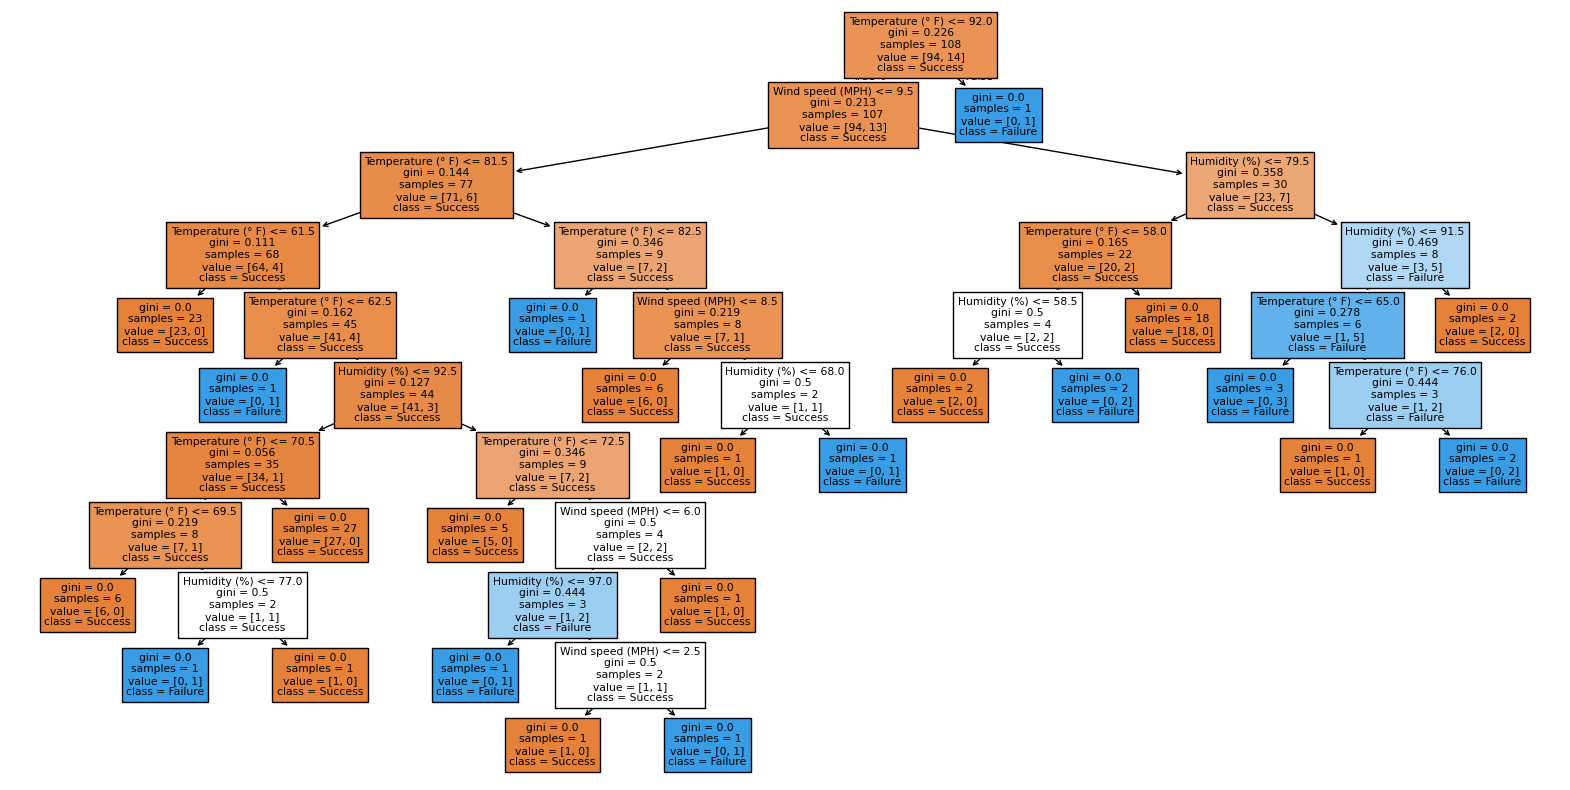

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Success", "Failure"])
plt.show()

Taking User Input and Make Predictions

In [7]:
# Function to take user input and make predictions
def predict_rocket_status():
    # Take input from the user
    temperature = float(input("Enter Temperature (°F): "))
    wind_speed = float(input("Enter Wind Speed (MPH): "))
    humidity = float(input("Enter Humidity (%): "))

    # Create a DataFrame for the input data
    user_input = pd.DataFrame({
        "Temperature (° F)": [temperature],
        "Wind speed (MPH)": [wind_speed],
        "Humidity (%)": [humidity]
    })

    # Make a prediction using the trained model
    prediction = model.predict(user_input)

    # Display the result
    if prediction[0] == 1:
        print("Prediction: Rocket Launch **Failure**")
    else:
        print("Prediction: Rocket Launch **Success**")

# Call the function to take input and make predictions
predict_rocket_status()

Enter Temperature (°F): 75
Enter Wind Speed (MPH): 10
Enter Humidity (%): 75
Prediction: Rocket Launch **Success**
